In [1]:
#Import libraries
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Visualization

In [2]:
#Represent dataset
df = pd.read_csv('Dataset_spine.csv')
df.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [3]:
#Description of the dataset
print("----------------------------------------------------------------------------------")
print("Shape of the dataset:",df.shape)
print("----------------------------------------------------------------------------------")
print("Description of the dataset:\n", df.describe())
print("----------------------------------------------------------------------------------")
print("Count of unique attributes:", df['Class_att'].value_counts())
print("----------------------------------------------------------------------------------")

----------------------------------------------------------------------------------
Shape of the dataset: (310, 7)
----------------------------------------------------------------------------------
Description of the dataset:
        pelvic incidence   pelvic tilt   lumbar lordosis angle   sacral slope  \
count        310.000000    310.000000              310.000000     310.000000   
mean          60.496653     17.542822               51.930930      42.953831   
std           17.236520     10.008330               18.554064      13.423102   
min           26.147921     -6.554948               14.000000      13.366931   
25%           46.430294     10.667069               37.000000      33.347122   
50%           58.691038     16.357689               49.562398      42.404912   
75%           72.877696     22.120395               63.000000      52.695888   
max          129.834041     49.431864              125.742385     121.429566   

        pelvic radius   grade of spondylolisthesis  


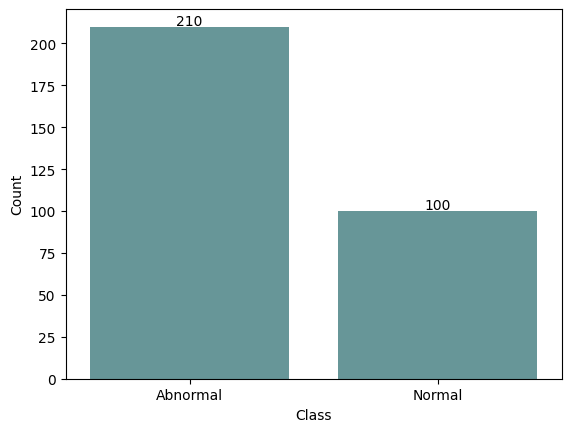

In [4]:
#show the number of Normal and Abnormal cases
class_count = df['Class_att'].value_counts().reset_index()
class_count.columns = ['Class', 'Count']
sns.barplot(x = 'Class', y = 'Count', data = class_count, color = 'cadetblue')
for i, row in class_count.iterrows():
    plt.text(x=i, y=row['Count'] + 1, s=row['Count'], ha='center')
plt.show()

# Dataset Preprocessing

In [5]:
#Let's get X and y value for the model
X = df.drop(['Class_att'], axis = 1)
y = df['Class_att']

In [6]:
#Split the dataset into test and train subset - 2:8 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
#Define LabelEncoder and StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()

In [8]:
#Scale the numerical columns
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.fit_transform(X_test)

In [9]:
#Encode the target column
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.fit_transform(y_test)

# RandomForest Classifier Model

In [10]:
#Define the Random Forest Classifier model
modelrfc = RandomForestClassifier()

In [11]:
#Fit the training set in the model
modelrfc.fit(X_train_processed, y_train_encoded)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
#Make predictions
y_pred_rfc = modelrfc.predict(X_test_processed)

In [13]:
#Define evaluations
accuracy_rfc = accuracy_score(y_test_encoded, y_pred_rfc)
cm_rfc = confusion_matrix(y_test_encoded, y_pred_rfc)
cr_rfc = classification_report(y_test_encoded, y_pred_rfc)
precision_rfc = precision_score(y_test_encoded, y_pred_rfc)
recall_rfc = recall_score(y_test_encoded, y_pred_rfc)

In [14]:
#Get the evaluations of the model
print("----------------------------------------------------------------------------------")
print(f"Accuracy of the Random Forest model:{accuracy_rfc*100:.2f}")
print("----------------------------------------------------------------------------------")
print(f"Precision of the Random Forest model:{precision_rfc:.2f}")
print("----------------------------------------------------------------------------------")
print(f"Recall of the Random Forest model:{recall_rfc:.2f}")
print("----------------------------------------------------------------------------------")
print(f"Classification of the Random Forest model:\n{cr_rfc}")
print("----------------------------------------------------------------------------------")
print(f"F1 Score:{f1_score(y_pred_rfc, y_test_encoded):.2f}")
print("----------------------------------------------------------------------------------")

----------------------------------------------------------------------------------
Accuracy of the Random Forest model:82.26
----------------------------------------------------------------------------------
Precision of the Random Forest model:0.64
----------------------------------------------------------------------------------
Recall of the Random Forest model:0.89
----------------------------------------------------------------------------------
Classification of the Random Forest model:
              precision    recall  f1-score   support

           0       0.95      0.80      0.86        44
           1       0.64      0.89      0.74        18

    accuracy                           0.82        62
   macro avg       0.79      0.84      0.80        62
weighted avg       0.86      0.82      0.83        62

----------------------------------------------------------------------------------
F1 Score:0.74
------------------------------------------------------------------------------

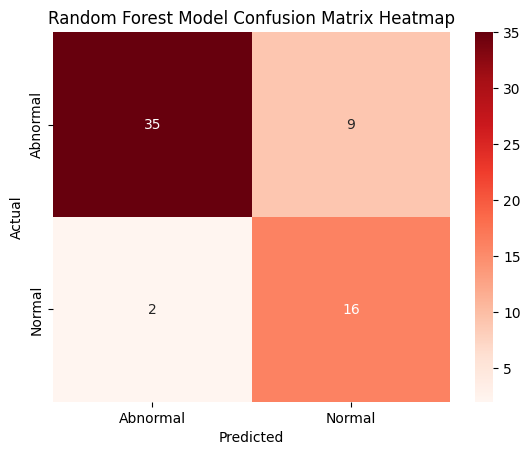

In [15]:
#Get the confusion matrix
labels = ['Abnormal', 'Normal']
sns.heatmap(cm_rfc, annot = True, fmt = 'd', cmap = 'Reds', xticklabels = labels, yticklabels = labels)
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title('Random Forest Model Confusion Matrix Heatmap')
plt.show()

# Logistic Regression Model

In [16]:
#Define the Logistic Regression model
model_lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [17]:
#Fit the training set in the model
model_lr.fit(X_train_processed, y_train_encoded)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [18]:
#Make predictions
y_pred_lr = model_lr.predict(X_test_processed)

In [19]:
#Define evaluations
accuracy_lr = accuracy_score(y_test_encoded, y_pred_lr)
cm_lr = confusion_matrix(y_test_encoded, y_pred_lr)
cr_lr = classification_report(y_test_encoded, y_pred_lr)
precision_lr = precision_score(y_test_encoded, y_pred_lr)
recall_lr = recall_score(y_test_encoded, y_pred_lr)

In [20]:
#Get the evaluations of the model
print("----------------------------------------------------------------------------------")
print(f"Accuracy of the Logistic Regression model:{accuracy_lr*100:.2f}%")
print("----------------------------------------------------------------------------------")
print(f"Precision of the Logistic Regression model:{precision_lr:.2f}")
print("----------------------------------------------------------------------------------")
print(f"Recall of the Logistic Regression model:{recall_lr:.2f}")
print("----------------------------------------------------------------------------------")
print(f"Classification of the Logistic Regression model:\n{cr_lr}")
print("----------------------------------------------------------------------------------")
print(f"F1 Score:{f1_score(y_pred_lr, y_test_encoded):.2f}")
print("----------------------------------------------------------------------------------")

----------------------------------------------------------------------------------
Accuracy of the Logistic Regression model:80.65%
----------------------------------------------------------------------------------
Precision of the Logistic Regression model:0.60
----------------------------------------------------------------------------------
Recall of the Logistic Regression model:1.00
----------------------------------------------------------------------------------
Classification of the Logistic Regression model:
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        44
           1       0.60      1.00      0.75        18

    accuracy                           0.81        62
   macro avg       0.80      0.86      0.80        62
weighted avg       0.88      0.81      0.82        62

----------------------------------------------------------------------------------
F1 Score:0.75
-----------------------------------------------------

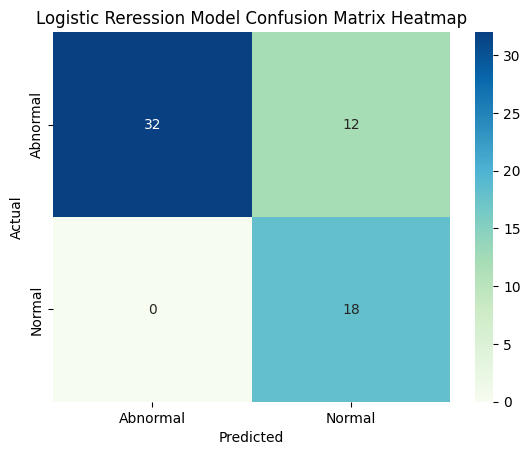

In [21]:
#Get the confusion matrix
labels = ['Abnormal', 'Normal']
sns.heatmap(cm_lr, annot = True, fmt = 'd', cmap = 'GnBu', xticklabels = labels, yticklabels = labels)
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title('Logistic Reression Model Confusion Matrix Heatmap')
plt.show()

# Support Vector Classifier Model

In [22]:
#Define the Support Vector Classifier model
svc = SVC(class_weight='balanced', probability=True, random_state=42)

In [23]:
#Fit the training set in the model
svc.fit(X_train_processed, y_train_encoded)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [24]:
#Make predictions
y_pred_svc = svc.predict(X_test_processed)

In [25]:
#Define evaluations
accuracy_svc = accuracy_score(y_test_encoded, y_pred_svc)
cm_svc = confusion_matrix(y_test_encoded, y_pred_svc)
cr_svc = classification_report(y_test_encoded, y_pred_svc)
precision_svc = precision_score(y_test_encoded, y_pred_svc)
recall_svc = recall_score(y_test_encoded, y_pred_svc)

In [26]:
#Get the evaluations of the model
print("----------------------------------------------------------------------------------")
print(f"Accuracy of the SVM model:{accuracy_svc*100:.2f}")
print("----------------------------------------------------------------------------------")
print(f"Precision of the SVM model:{precision_svc:.2f}")
print("----------------------------------------------------------------------------------")
print(f"Recall of the SVM model:{recall_svc:.2f}")
print("----------------------------------------------------------------------------------")
print(f"Classification of the SVM model:\n{cr_svc}")
print("----------------------------------------------------------------------------------")
print(f"f1 score:{f1_score(y_test_encoded, y_pred_svc):.2f}")

----------------------------------------------------------------------------------
Accuracy of the SVM model:83.87
----------------------------------------------------------------------------------
Precision of the SVM model:0.64
----------------------------------------------------------------------------------
Recall of the SVM model:1.00
----------------------------------------------------------------------------------
Classification of the SVM model:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        44
           1       0.64      1.00      0.78        18

    accuracy                           0.84        62
   macro avg       0.82      0.89      0.83        62
weighted avg       0.90      0.84      0.85        62

----------------------------------------------------------------------------------
f1 score:0.78


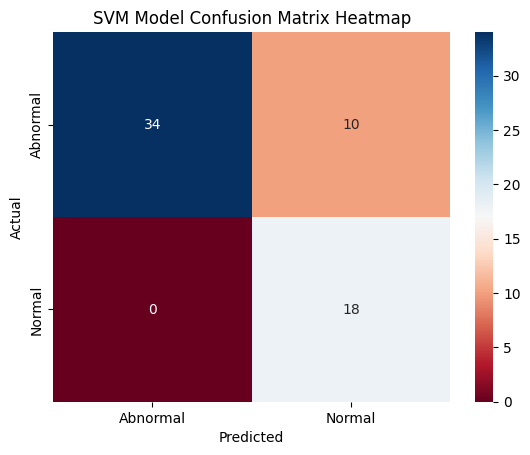

In [27]:
#Get the confusion matrix
labels = ['Abnormal', 'Normal']
sns.heatmap(cm_svc, annot = True, fmt = 'd', cmap = 'RdBu', xticklabels = labels, yticklabels = labels)
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title('SVM Model Confusion Matrix Heatmap')
plt.show()

# ROC-AUC for the three models

In [28]:
# For SVM, decision_function
svm_score = svc.decision_function(X_test_processed)
fpr_svm, tpr_svm, _ = roc_curve(y_test_encoded, svm_score)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# For Logistic Regression, predict_proba
lr_probs = model_lr.predict_proba(X_test_processed)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test_encoded, lr_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# For Random Forest, predict_proba
rfc_probs = modelrfc.predict_proba(X_test_processed)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_encoded, rfc_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

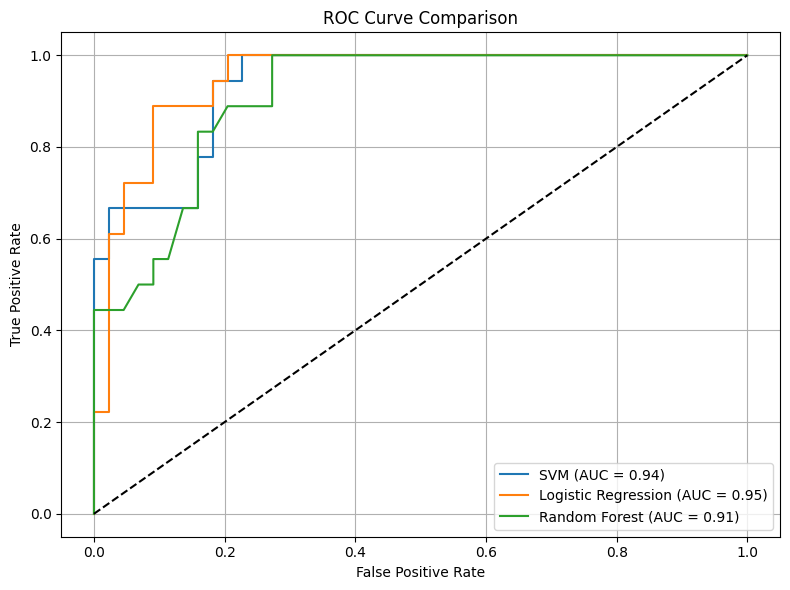

In [29]:
# Plotting roc curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()